In [1]:
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt

In [2]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

In [3]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
rawData = pd.read_csv('credit2.csv', header=1)

In [6]:
rawData.head()

,1.0,20000,female,university,1,24,2,2.1,-1,-1.1,...,0,0.1,0.2,0.3,689.1,0.4,0.5,0.6,0.7,default
0,2.0,120000,female,university,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
1,3.0,90000,female,university,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
2,4.0,50000,female,university,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
3,5.0,50000,male,university,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,not default
4,6.0,50000,male,graduate school,2,37,0,0,0,0,...,19394,19619,20024,2500,1815,657,1000,1000,800,not default


In [7]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29999 entries, 0 to 29998
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   1.0         29999 non-null  float64
 1   20000       29999 non-null  int64  
 2   female      29999 non-null  object 
 3   university  29999 non-null  object 
 4   1           29999 non-null  int64  
 5   24          29999 non-null  int64  
 6   2           29999 non-null  int64  
 7   2.1         29999 non-null  int64  
 8   -1          29999 non-null  int64  
 9   -1.1        29999 non-null  int64  
 10  -2          29999 non-null  int64  
 11  -2.1        29999 non-null  int64  
 12  3913        29999 non-null  int64  
 13  3102        29999 non-null  int64  
 14  689         29999 non-null  int64  
 15  0           29999 non-null  int64  
 16  0.1         29999 non-null  int64  
 17  0.2         29999 non-null  int64  
 18  0.3         29999 non-null  int64  
 19  689.1       29999 non-nul

In [23]:
X = rawData.iloc[:, 5:15]

In [24]:
y = rawData.iloc[:,1]

In [25]:
model = LinearRegression(n_jobs=10)

In [26]:
print(y)

0        120000
1         90000
2         50000
3         50000
4         50000
          ...  
29994    220000
29995    150000
29996     30000
29997     80000
29998     50000
Name: 20000, Length: 29999, dtype: int64


In [27]:
from sklearn.model_selection import cross_val_score

In [28]:
print(cross_val_score(model, X, y, cv=3))

[0.25361191 0.27161907 0.26841619]


In [29]:
algosClass = []

algosClass.append(('Random Forest Regressor',RandomForestRegressor()))

algosClass.append(('Linear Regression',LinearRegression()))

algosClass.append(('Support Vector Regression',SVR()))

In [30]:
results = []
names = []
for name, model in algosClass:
    result = cross_val_score(model, X,y, cv=3, scoring='r2')
    names.append(name)
    results.append(result)

In [31]:
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Regressor 0.3792898596391596
Linear Regression 0.26454905705204296
Support Vector Regression -0.050913599567273295


In [43]:
algo = LinearRegression()

In [44]:
import numpy as np
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [46]:
model = algo.fit(X_train,y_train)

In [48]:
model

LinearRegression()

In [51]:
predictions = model.predict(X_test)
predictions

array([169686.14218894, 223167.6960681 , 128500.17669804, ...,
       196261.55894584, 140863.72417783, 183638.0504596 ])

In [52]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [53]:
from math import sqrt

In [54]:
rmse = sqrt(mean_squared_error(y_test, predictions))

In [55]:
rmse

110078.10143711239

In [56]:
predRsquared = r2_score(y_test,predictions)

In [57]:
predRsquared

0.27306915675670485

In [58]:
predictions = model.predict(X_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.273
RMSE: 110078.101


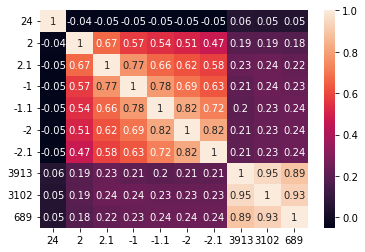

In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = rawData.iloc[:, 5:15]
matrix = df.corr().round(2)
sns.heatmap(matrix, annot=True)
plt.show()